First, we will import the data. Initially, we will work on the training set

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd  

df = pd.read_csv("/kaggle/input/titanic/train.csv")  # Kaggle dataset path  
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Handle Missing Values (Corrected)
df = df.assign(Age=df['Age'].fillna(df['Age'].median()))
df.dropna(inplace=True)  # Drop remaining rows with missing values



In [4]:
# Step 4: Feature Scaling (Min-Max Scaling on 'Age' & 'Fare')
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [5]:
# Step 5: Feature Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male → 1, Female → 0

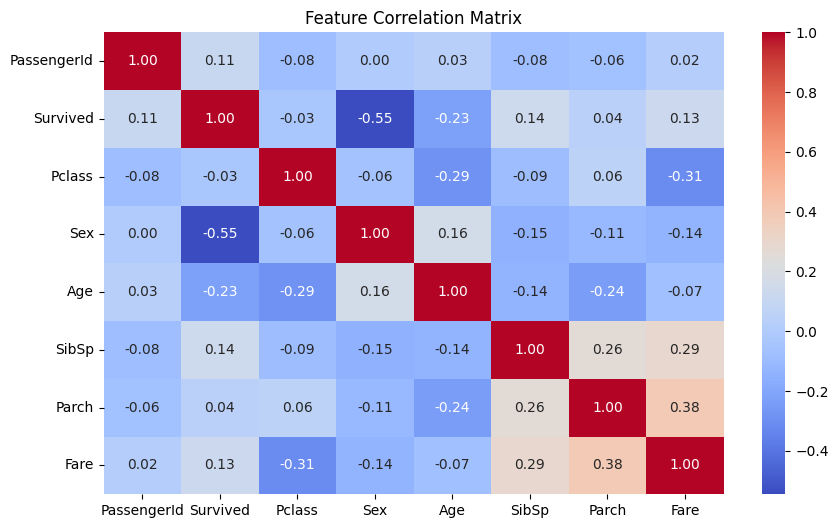

In [6]:
# Step 6: Feature Selection (Check Correlation Matrix)
# Keep only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=[np.number])  

# Plot the correlation matrix heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Drop one of the highly correlated features (if needed)
df.drop(columns=['Fare'], inplace=True, errors="ignore")  # Drop 'Fare' if it is highly correlated


In [7]:
# Debugging: Print column names before feature selection
print("Columns before feature selection:", df.columns)

# Fix 'Survived' column issue (check correct case)
target_col = 'Survived' if 'Survived' in df.columns else 'survived'

# Step 8: Feature Selection - Ensure Only Numeric Columns
X = df.drop(columns=[target_col], errors="ignore")  # Drop the target column
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
y = df[target_col]  # Target variable

# Apply Recursive Feature Elimination (RFE)
log_model = LogisticRegression(max_iter=200)
rfe = RFE(log_model, n_features_to_select=min(5, X.shape[1]))  # Ensure at least 5 features
X_selected = rfe.fit_transform(X, y)


Columns before feature selection: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
# Step 9: Train a Simple ML Model (Logistic Regression)

# Check the shape of selected features
print(f"Shape of X_selected: {X_selected.shape}")
print(f"Shape of y: {y.shape}")

# Ensure that we have enough features after RFE
if X_selected.shape[1] == 0:
    raise ValueError("Feature selection removed all features. Adjust the number of features to select.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)


Shape of X_selected: (202, 5)
Shape of y: (202,)


In [9]:
# Step 10: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (After Feature Selection): {accuracy:.2f}")

Model Accuracy (After Feature Selection): 0.83


In [10]:
# Step 11: Save Processed Data
df.to_csv("processed_titanic_data.csv", index=False)
print("Processed dataset saved successfully!")

Processed dataset saved successfully!
